In [1]:
import numpy as np
import glob
import dill
from tqdm import tqdm
from utils import MinMaxScaler, StandardScaler, make_dir, sort_fn, save_object
import matplotlib.pyplot as plt
from multiprocessing import Pool

In [2]:
x_paths = sorted(glob.glob("../../SPCAM5/inputs_*"), key=sort_fn)
y_paths = sorted(glob.glob("../../SPCAM5/outputs_*"), key=sort_fn)

In [3]:
n = 183 # first dataset: 6 monnths
train_x = x_paths[:int(n*0.8)]
train_y = y_paths[:int(n*0.8)]
val_x = x_paths[int(n*0.8): n]
val_y = y_paths[int(n*0.8): n]
test_x = x_paths[n:365]
test_y = y_paths[n:365]

In [11]:
n = 365 # second dataset: 1 year
train_x = x_paths[183:int(n*0.8)]
train_y = y_paths[183:int(n*0.8)]
val_x = x_paths[int(n*0.8): n]
val_y = y_paths[int(n*0.8): n]
test_x = x_paths[n:]
test_y = y_paths[n:]

In [12]:
# x_scaler_minmax = MinMaxScaler()
# y_scaler_minmax = MinMaxScaler()
# x_scaler_standard = StandardScaler()
# y_scaler_standard = StandardScaler()

x_scaler_minmax = dill.load(open("dataset_1_x_scaler_minmax.pkl", "rb"))
y_scaler_minmax = dill.load(open("dataset_1_y_scaler_minmax.pkl", "rb"))
x_scaler_standard = dill.load(open("dataset_1_x_scaler_standard.pkl", "rb"))
y_scaler_standard = dill.load(open("dataset_1_y_scaler_standard.pkl", "rb"))

def fit_scalers(paths):
    x_path, y_path = paths
    x = np.load(x_path)
    y = np.load(y_path)[:, :26]

    x_scaler_minmax.fit(x)
    y_scaler_minmax.fit(y)
    x_scaler_standard.fit(x)
    y_scaler_standard.fit(y)
    print(x_path, end='\r')

with Pool(processes=4) as pool:  # Change this to match your CPU cores
    pool.map(fit_scalers, zip(train_x, train_y))


save_object(x_scaler_minmax, f"dataset_2_x_scaler_minmax.pkl")
save_object(y_scaler_minmax, f"dataset_2_y_scaler_minmax.pkl")
save_object(x_scaler_standard, f"dataset_2_x_scaler_standard.pkl")
save_object(y_scaler_standard, f"dataset_2_y_scaler_standard.pkl")

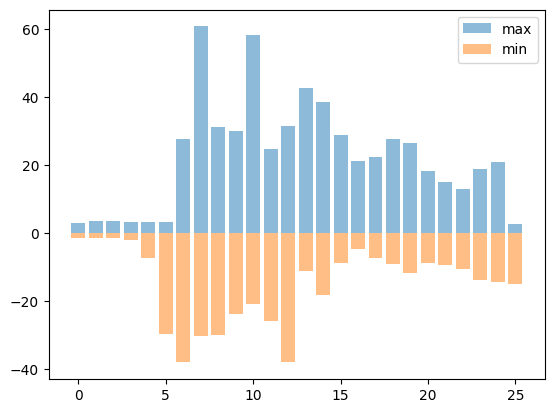

In [41]:
plt.bar(np.arange(26), np.max(y, axis=0), alpha=0.5, label="max")
plt.bar(np.arange(26), np.min(y, axis=0), alpha=0.5, label="min")
plt.legend()
plt.show()

In [24]:
def save_object(obj, filename):
    dill.dump(obj, file=open(filename, "wb"))

In [26]:
save_object(x_scaler, 'x_scaler.dill')

In [27]:
save_object(y_scaler, 'y_scaler.dill')

In [16]:
x_scaler = dill.load(open(f"x_minmax_scaler.pkl", 'rb'))
y_scaler = dill.load(open(f"y_minmax_scaler.pkl", 'rb'))

In [32]:
def sort_fn(filename):
    date_string = filename[-14:-4]
    datetime_object = datetime.datetime.strptime(date_string, "%Y_%m_%d")
    return datetime_object

x_path = sorted(glob.glob("../CAM5/inputs*"), key=sort_fn)
y_path = sorted(glob.glob("../CAM5/outputs*"), key=sort_fn)

In [36]:
x = np.load(x_path[0])[:, :-1]
x = x_scaler.transform(x)

In [40]:
x.max()

1.5042228

In [22]:
x_scaler.min.shape

(109,)

In [21]:
y_scaler.min.shape

(112,)